Feel free to make any suggestions that will help make this notebook better. 
The EDA and Feature Engineering was inspired by [Kenjee's Notebook on Titanic](https://www.kaggle.com/kenjee/titanic-project-example). 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


Importing our Data from Kaggle.

In [2]:
gs = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [3]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Exploration

**Lets get some insights about our data.**

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


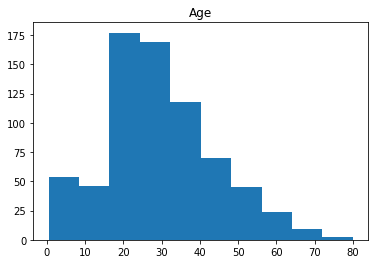

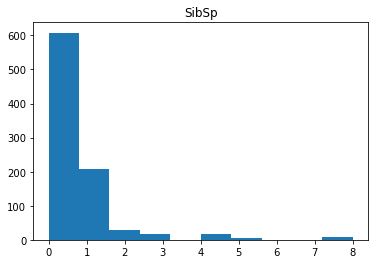

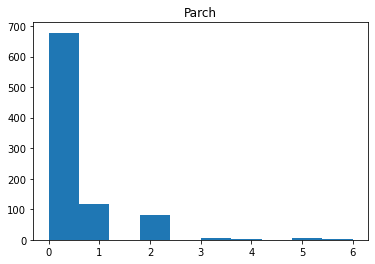

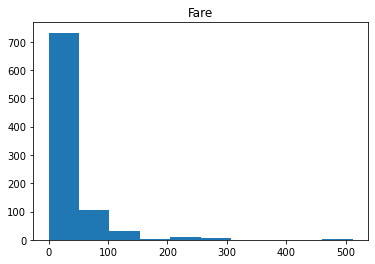

In [9]:
#distributions for all numeric variables 
for i in train[['Age','SibSp','Parch','Fare']].columns:
    plt.hist(train[i])
    plt.title(i)
    plt.show()

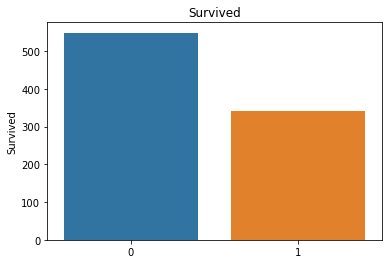

In [10]:
sns.barplot(train['Survived'].value_counts().index,train['Survived'].value_counts()).set_title('Survived')
plt.show()

In [11]:
pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


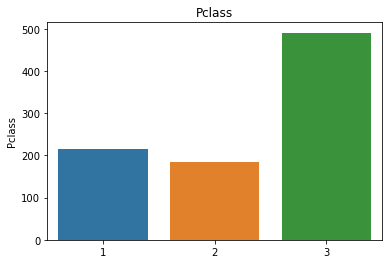

In [12]:
sns.barplot(train['Pclass'].value_counts().index,train['Pclass'].value_counts()).set_title('Pclass')
plt.show()

In [13]:
pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


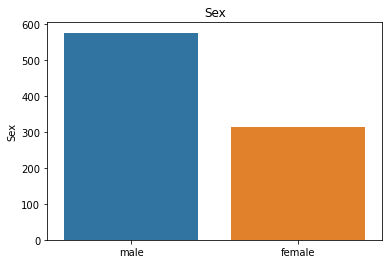

In [14]:
sns.barplot(train['Sex'].value_counts().index,train['Sex'].value_counts()).set_title('Sex')
plt.show()

In [15]:
pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


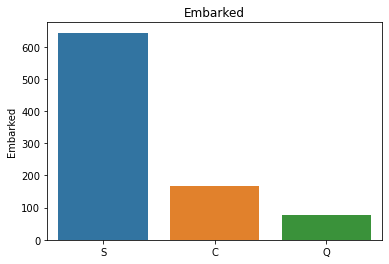

In [16]:
sns.barplot(train['Embarked'].value_counts().index,train['Embarked'].value_counts()).set_title('Embarked')
plt.show()

Lets also check out cabin and ticket features even though the columns wont make much sense on their own without any feature engineering.

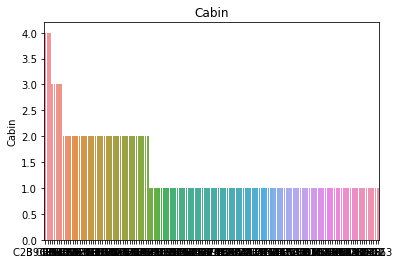

In [17]:
sns.barplot(train['Cabin'].value_counts().index,train['Cabin'].value_counts()).set_title('Cabin')
plt.show()

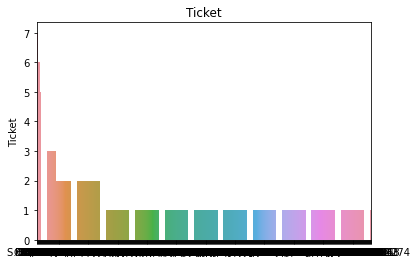

In [18]:
sns.barplot(train['Ticket'].value_counts().index,train['Ticket'].value_counts()).set_title('Ticket')
plt.show()

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


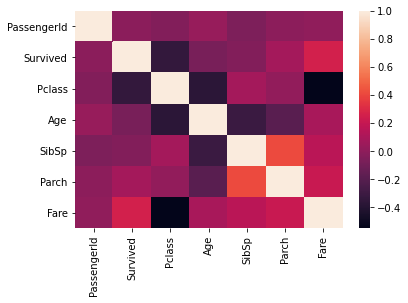

In [19]:
#Check correlation between our features.
print(train.corr())
sns.heatmap(train.corr())

Our best feature currently seems to be 'Fare' according to the correlation map as it has high correlation with our target ie. 'Survived'

# Feature Engineering 

In [20]:
#Creating variable for total family.
train['Fam'] = train['SibSp'] + train['Parch']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fam
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [21]:
#Get cabin Letters from the cabin column.

train['cabin_adv'] = train.Cabin.apply(lambda x: str(x)[0])

#comparing surivial rate by cabin
print(train.cabin_adv.value_counts())
pd.pivot_table(train,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')


n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [22]:
#make things simple drop T since theres only 1 row.

train[train['cabin_adv'] == 'T'].index
train.drop(index = 339, inplace = True)
train.cabin_adv.value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: cabin_adv, dtype: int64

In [23]:
#Getting the numbers and letters out of the tickets column
train['numeric_ticket'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train['ticket_letters'] = train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

#lets us view all rows in dataframe through scrolling. This is for convenience 
pd.set_option("max_rows", None)
train['ticket_letters'].value_counts()

0            664
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
sopp           3
pp             3
wep            3
scah           2
swpp           2
sotono2        2
ppp            2
fc             1
scow           1
sca4           1
sp             1
sc             1
scahbasle      1
as             1
casoton        1
fa             1
sop            1
Name: ticket_letters, dtype: int64

In [24]:
#survival rate across different tyicket types 
pd.pivot_table(train,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,409.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [25]:
#feature engineering on person's title 
train.Name.head(50)
train['name_title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#mr., ms., master. etc

train['name_title'].value_counts()

Mr              516
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
the Countess      1
Lady              1
Mme               1
Jonkheer          1
Don               1
Ms                1
Sir               1
Capt              1
Name: name_title, dtype: int64

In [26]:
pd.pivot_table(train,index='Survived',columns='name_title', values = 'Ticket', aggfunc='count')

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,435.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


Now lets also apply our Feature Engineering changes to test data.

In [27]:
test['Fam'] = test['SibSp'] + test['Parch']
test['cabin_adv'] = test.Cabin.apply(lambda x: str(x)[0])
test['numeric_ticket'] = test.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
test['ticket_letters'] = test.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
test.Name.head(50)
test['name_title'] = test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
# test.head()
test['cabin_adv'].value_counts()

n    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: cabin_adv, dtype: int64

Lets handle **Null** values in our **train** data.

In [28]:
#impute nulls for continuous data 
train.Age = train.Age.fillna(train.Age.median())
train.Fare = train.Fare.fillna(train.Fare.median())
#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
train.dropna(subset=['Embarked'],inplace = True)
train.drop(columns=['Name', 'PassengerId', 'Cabin'], inplace = True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fam,cabin_adv,numeric_ticket,ticket_letters,name_title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,n,0,a5,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,C,0,pc,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,n,0,stono2,Miss
3,1,1,female,35.0,1,0,113803,53.1000,S,1,C,1,0,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,S,0,n,1,0,Mr


Lets also handle **Null** values in our **test** data.

In [29]:
#impute nulls for continuous data 
test.Age = test.Age.fillna(train.Age.median())
test.Fare = test.Fare.fillna(train.Fare.median())

#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
test.dropna(subset=['Embarked'],inplace = True)
passid = test['PassengerId'].copy()
test.drop(columns=['Name', 'PassengerId', 'Cabin'], inplace = True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fam,cabin_adv,numeric_ticket,ticket_letters,name_title
0,3,male,34.5,0,0,330911,7.8292,Q,0,n,1,0,Mr
1,3,female,47.0,1,0,363272,7.0000,S,1,n,1,0,Mrs
2,2,male,62.0,0,0,240276,9.6875,Q,0,n,1,0,Mr
3,3,male,27.0,0,0,315154,8.6625,S,0,n,1,0,Mr
4,3,female,22.0,1,1,3101298,12.2875,S,2,n,1,0,Mrs


Lets get our data **One Hot Encoded**.
We treated to training and test set separately until now, but its just simpler to get the one hot encodings if the datasets are concatenated.

In [30]:
df = pd.concat([train.assign(ind=1), test.assign(ind=0)])
df_hot = pd.get_dummies(df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Fam', 'cabin_adv', 'numeric_ticket', 'ticket_letters', 'name_title', 'ind']])
#notice that I left out our target column.
df_hot.head()

,Pclass,Age,SibSp,Parch,Fare,Fam,numeric_ticket,ind,Sex_female,Sex_male,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,3,22.0,1,0,7.2500,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,38.0,1,0,71.2833,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,3,26.0,0,0,7.9250,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,1,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,3,35.0,0,0,8.0500,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [31]:
test_hot, train_hot = df_hot[df_hot["ind"].eq(0)], df_hot[df_hot["ind"].eq(1)]


In [32]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
train_hot[['Age','SibSp','Parch','Fare', 'Fam']]= scale.fit_transform(train_hot[['Age','SibSp','Parch','Fare', 'Fam']])
train_hot.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Pclass,Age,SibSp,Parch,Fare,Fam,numeric_ticket,ind,Sex_female,Sex_male,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,3,-0.562459,0.430627,-0.474653,-0.499883,0.057199,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,0.670753,0.430627,-0.474653,0.788582,0.057199,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,3,-0.254156,-0.475527,-0.474653,-0.486300,-0.562221,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0.439525,0.430627,-0.474653,0.422701,0.057199,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,3,0.439525,-0.475527,-0.474653,-0.483785,-0.562221,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [33]:
scale = StandardScaler()
test_hot[['Age','SibSp','Parch','Fare', 'Fam']]= scale.fit_transform(test_hot[['Age','SibSp','Parch','Fare', 'Fam']])
test_hot.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Pclass,Age,SibSp,Parch,Fare,Fam,numeric_ticket,ind,Sex_female,Sex_male,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,3,0.371062,-0.499470,-0.400248,-0.497413,-0.553443,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,3,1.358985,0.616992,-0.400248,-0.512278,0.105643,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2,2.544493,-0.499470,-0.400248,-0.464100,-0.553443,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,3,-0.221692,-0.499470,-0.400248,-0.482475,-0.553443,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,3,-0.616861,0.616992,0.619896,-0.417492,0.764728,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [34]:
Y_train = train['Survived']
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [35]:
print(train_hot.shape)
print(test_hot.shape)
print(Y_train.shape)
train_hot.head()

(888, 1001)
(418, 1001)
(888,)


,Pclass,Age,SibSp,Parch,Fare,Fam,numeric_ticket,ind,Sex_female,Sex_male,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,3,-0.562459,0.430627,-0.474653,-0.499883,0.057199,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,0.670753,0.430627,-0.474653,0.788582,0.057199,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,3,-0.254156,-0.475527,-0.474653,-0.486300,-0.562221,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0.439525,0.430627,-0.474653,0.422701,0.057199,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,3,0.439525,-0.475527,-0.474653,-0.483785,-0.562221,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [36]:
test_hot.head()

,Pclass,Age,SibSp,Parch,Fare,Fam,numeric_ticket,ind,Sex_female,Sex_male,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,3,0.371062,-0.499470,-0.400248,-0.497413,-0.553443,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,3,1.358985,0.616992,-0.400248,-0.512278,0.105643,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2,2.544493,-0.499470,-0.400248,-0.464100,-0.553443,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,3,-0.221692,-0.499470,-0.400248,-0.482475,-0.553443,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,3,-0.616861,0.616992,0.619896,-0.417492,0.764728,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


# Model

Seems like we are all set on the data.
Lets try a few models to see how they perform on our data


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [38]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1, learning_rate = 0.5, min_child_weight = 0.03)
cv = cross_val_score(xgb,train_hot,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.83146067 0.83707865 0.86516854 0.81920904 0.85875706]
0.8423347933726909


In [39]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
cv = cross_val_score(rfc,train_hot,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.70786517 0.78651685 0.74157303 0.76271186 0.77966102]
0.7556655875071414


In [40]:
svc = SVC(probability = True)
cv = cross_val_score(svc,train_hot,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.84831461 0.8258427  0.82022472 0.8079096  0.8700565 ]
0.834469624833365


# Ensemble
Trying out and tuning different models, tuning on validation set and ensembling them. We will ensemble our model by **stacking**


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    train_hot, Y_train, test_size=0.33, random_state=42)

Training Our **First-Level Base Models**.

In [42]:
svc = SVC(probability = True)
svc.fit(X_train, y_train)

SVC(probability=True)

In [43]:
xgb = XGBClassifier(random_state =1, learning_rate = 0.5, min_child_weight = 0.03)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=0.03, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
from keras.models import Sequential
from keras.layers import Dense
dl1 = Sequential()
dl1.add(Dense(1002, activation='relu'))
dl1.add(Dense(512, activation='relu'))
dl1.add(Dense(1, activation='sigmoid'))
# compile the keras model
dl1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
dl1.fit(X_train, y_train, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = dl1.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
60/60 [==============================] - 0s 6ms/step - loss: 0.4852 - accuracy: 0.7761
Epoch 2/150
60/60 [==============================] - 0s 5ms/step - loss: 0.3451 - accuracy: 0.8586
Epoch 3/150
60/60 [==============================] - 0s 5ms/step - loss: 0.2488 - accuracy: 0.8939
Epoch 4/150
60/60 [==============================] - 0s 5ms/step - loss: 0.1255 - accuracy: 0.9579
Epoch 5/150
60/60 [==============================] - 0s 6ms/step - loss: 0.0524 - accuracy: 0.9865
Epoch 6/150
60/60 [==============================] - 0s 5ms/step - loss: 0.0384 - accuracy: 0.9882
Epoch 7/150
60/60 [==============================] - 0s 5ms/step - loss: 0.0260 - accuracy: 0.9933
Epoch 8/150
60/60 [==============================] - 0s 5ms/step - loss: 0.0283 - accuracy: 0.9933
Epoch 9/150
60/60 [==============================] - 0s 5ms/step - loss: 0.0208 - accuracy: 0.9933
Epoch 10/150
60/60 [==============================] - 0s 5ms/step - loss: 0.0183 - accuracy: 0.9933
Epoch 11/

In [45]:
dl2 = Sequential()
dl2.add(Dense(1002, activation='relu'))
dl2.add(Dense(512, activation='relu'))
dl2.add(Dense(256, activation='relu'))
# dl2.add(Dense(128, activation='relu'))
dl2.add(Dense(1, activation='sigmoid'))
# compile the keras model
dl2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
dl2.fit(X_train, y_train, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = dl2.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
60/60 [==============================] - 0s 7ms/step - loss: 0.5262 - accuracy: 0.7475
Epoch 2/150
60/60 [==============================] - 0s 7ms/step - loss: 0.3816 - accuracy: 0.8502
Epoch 3/150
60/60 [==============================] - 0s 7ms/step - loss: 0.2693 - accuracy: 0.8956
Epoch 4/150
60/60 [==============================] - 0s 7ms/step - loss: 0.1428 - accuracy: 0.9529
Epoch 5/150
60/60 [==============================] - 0s 7ms/step - loss: 0.0681 - accuracy: 0.9798
Epoch 6/150
60/60 [==============================] - 0s 7ms/step - loss: 0.0416 - accuracy: 0.9848
Epoch 7/150
60/60 [==============================] - 0s 7ms/step - loss: 0.0427 - accuracy: 0.9848
Epoch 8/150
60/60 [==============================] - 0s 7ms/step - loss: 0.0265 - accuracy: 0.9933
Epoch 9/150
60/60 [==============================] - 0s 7ms/step - loss: 0.0194 - accuracy: 0.9949
Epoch 10/150
60/60 [==============================] - 0s 7ms/step - loss: 0.0222 - accuracy: 0.9916
Epoch 11/

In [46]:
knn = KNeighborsClassifier(algorithm= 'auto', n_neighbors = 7,weights= 'uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [47]:
lr = LogisticRegression(max_iter = 2000,
              solver = 'liblinear')
lr.fit(X_train, y_train)

LogisticRegression(max_iter=2000, solver='liblinear')

In [48]:
rf = RandomForestClassifier(random_state = 1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

Predicting on Validation Set.

In [49]:
#Valid preds
valid_preds1 = svc.predict(X_valid)
valid_preds2 = xgb.predict(X_valid)
valid_preds_ur3 = dl1.predict(X_valid)
valid_preds3 = [round(x[0]) for x in valid_preds_ur3]
valid_preds_ur4 = dl2.predict(X_valid)
valid_preds4 = [round(x[0]) for x in valid_preds_ur4]
valid_preds5 = knn.predict(X_valid)
valid_preds6 = lr.predict(X_valid)
valid_preds7 = rf.predict(X_valid)

In [50]:
valid_preds6

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0])

In [51]:
valid_preds7

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0])

Validation scores of our models.

In [52]:
from sklearn.metrics import accuracy_score
print("SVC:", accuracy_score(y_valid, valid_preds1))
print("XGB:", accuracy_score(y_valid, valid_preds2))
print("DL1:", accuracy_score(y_valid, valid_preds3))
print("DL2:", accuracy_score(y_valid, valid_preds4))
print("KNN:", accuracy_score(y_valid, valid_preds5))
print("LR:", accuracy_score(y_valid, valid_preds5))
print("RF:", accuracy_score(y_valid, valid_preds5))

SVC: 0.8163265306122449
XGB: 0.8129251700680272
DL1: 0.6360544217687075
DL2: 0.8027210884353742
KNN: 0.7891156462585034
LR: 0.7891156462585034
RF: 0.7891156462585034


In [53]:
#Test preds
test_preds1 = svc.predict(test_hot)
test_preds2 = xgb.predict(test_hot)
test_preds_ur3 = dl1.predict(test_hot)
test_preds3 = [round(x[0]) for x in test_preds_ur3]
test_preds_ur4 = dl2.predict(test_hot)
test_preds4 = [round(x[0]) for x in test_preds_ur4]
test_preds5 = knn.predict(test_hot)
test_preds6 = lr.predict(test_hot)
test_preds7 = rf.predict(test_hot)

In [54]:
test_preds6

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [55]:
test_preds7

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

Stacking our Predictions to pass on to the meta model.

In [56]:
stacked_predictions = np.column_stack([valid_preds1,valid_preds2,valid_preds3,valid_preds4, valid_preds5, valid_preds6, valid_preds7])
stacked_test_predictions = np.column_stack([test_preds1,test_preds2,test_preds3,test_preds4, test_preds5, test_preds6, test_preds7])

In [57]:
stacked_predictions

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [58]:
stacked_test_predictions

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 0., 1.]])

Training our Level 2 meta model on the stacked predictions of our Level 1 models.

In [59]:
from sklearn.linear_model import LinearRegression
#Making our Final predictions of ensemble.
meta_model = LinearRegression()
meta_model.fit(stacked_predictions, y_valid)
meta_predictions_ur = meta_model.predict(stacked_test_predictions)
preds = [round(x) for x in meta_predictions_ur]
preds

[0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 -0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 -0.0,
 -0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 -0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 -0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 -0.0,
 -0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,


In [60]:
#Checking out the sample submission
gs.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [61]:
df = pd.DataFrame({'PassengerId': passid,
                  'Survived' : preds})
df.Survived = df.Survived.astype(int)
print(df.shape)
df.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [62]:
df['Survived'].sum()

146

In [63]:
df.to_csv('submission_final.csv', index =False)